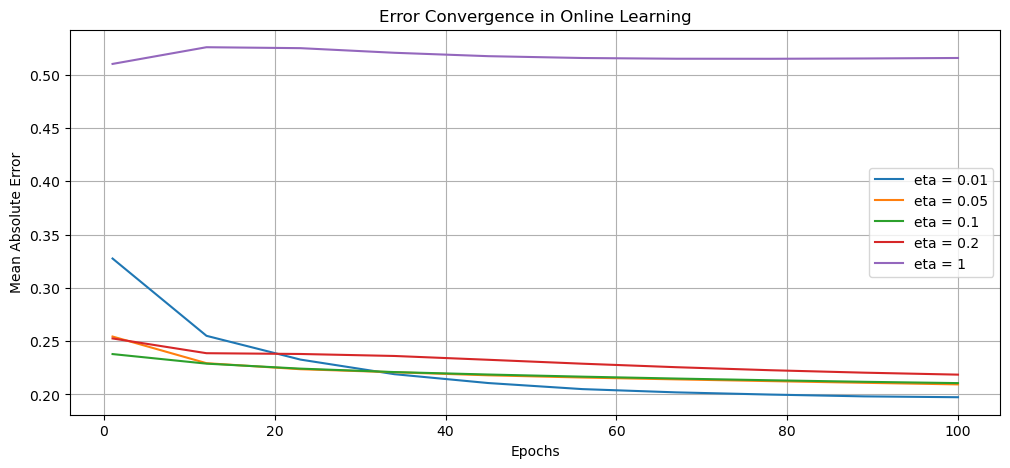

In [27]:
import numpy as np
import matplotlib.pyplot as plt

noise_variance = 0.1
X_train = np.arange(0, 2*np.pi, 0.1)
sin_Y_train = np.sin(2 * X_train) + np.random.normal(0, np.sqrt(noise_variance), len(X_train))
X_test = np.arange(0.05, 2 * np.pi, 0.1)
sin_Y_test = np.sin(2 * X_test) + np.random.normal(0, np.sqrt(noise_variance), len(X_test))
sin_Y_true_test= np.sin(2 * X_test)

class RBFNN:
    def __init__(self, node_number, sigma=1.0, eta=0.01, random_state= False):
        self.node_number = node_number
        self.sigma = sigma
        self.eta = eta  
        self.node_positions = None
        self.weights = None
        self.kernel_matrix = None
        self.training_errors = []
        self.random_state = random_state
    def get_node_positions(self, X):
        if self.random_state:
            self.node_positions = np.random.uniform(0, 2*np.pi, self.node_number)
        else:
            self.node_positions = np.linspace(0, 2*np.pi, self.node_number)

    def RBF_function(self, x, node_position):
        return np.exp(-np.linalg.norm(x - node_position)**2 / (2 * self.sigma**2))

    def get_kernel_matrix(self, X):
        self.get_node_positions(X)
        kernel_matrix = np.zeros((len(X), self.node_number))
        for i in range(len(X)):
            kernel_matrix[i, :] = np.array([self.RBF_function(X[i], node_position) for node_position in self.node_positions])
        return kernel_matrix

    def fit_batch(self, X, Y):
        self.kernel_matrix = self.get_kernel_matrix(X)
        self.weights, _, _, _ = np.linalg.lstsq(self.kernel_matrix, Y, rcond=None)

    def fit_online(self, X, Y, epochs=100):
        self.get_node_positions(X)
        self.weights = np.random.randn(self.node_number)
        self.training_errors = []
        for epoch in range(epochs):

            total_error = 0
            for i in range(len(X)):
                phi_x = np.array([self.RBF_function(X[i], node_position) for node_position in self.node_positions])
                y_pred = np.dot(phi_x, self.weights)
                error = Y[i] - y_pred
                self.weights += self.eta * error * phi_x
                total_error += np.abs(error)
            if (epoch+1) % 10 ==0:
                self.training_errors.append(total_error / len(X))

    def predict(self, X_test):
        kernel_test = self.get_kernel_matrix(X_test)
        return np.dot(kernel_test, self.weights)


node_number = 10
sigma = 0.7
eta_list = [0.01,0.05, 0.1,0.2,1]
epochs = 100
error_list = []

for eta in eta_list:
    rbf_online = RBFNN(node_number, sigma, eta)
    rbf_online.fit_online(X_train, sin_Y_train, epochs)
    error_list.append(rbf_online.training_errors)

plt.figure(figsize=(12, 5))
for i, eta in enumerate(eta_list):
    plt.plot(np.linspace(1, epochs, len(error_list[i])), error_list[i], label=f"eta = {eta}")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Error Convergence in Online Learning")
plt.legend()
plt.grid()
plt.show()


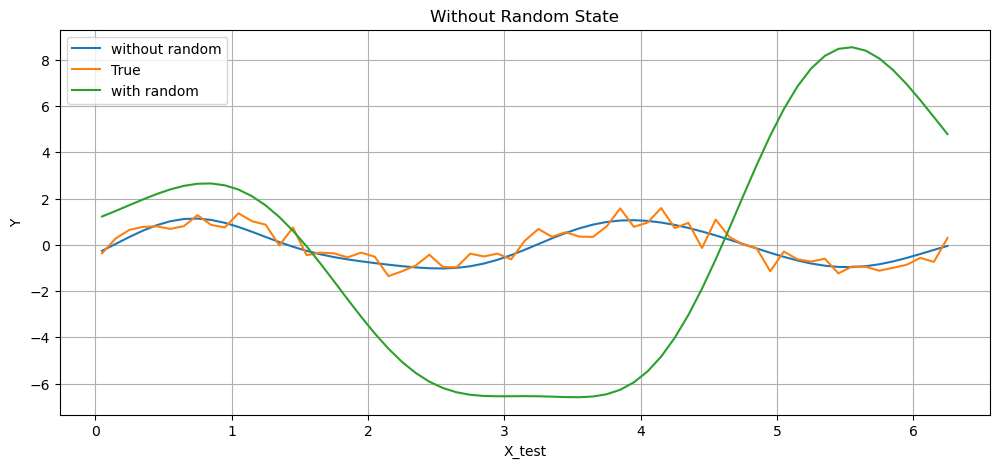

MAE without random state: 0.2837961775227818
MAE with random state: 4.511572215658825
MAE_true without random state: 0.11416454640490406
MAE_true with random state: 4.486715426361419


In [28]:
node_number = 10
sigma = 0.7
eta_list = 0.05
epochs = 1000

rbf_online = RBFNN(node_number, sigma, eta)
rbf_online.fit_online(X_train, sin_Y_train, epochs)
y_pred_uniform = rbf_online.predict(X_test)
MAE_uniform = np.mean(np.abs(y_pred_uniform - sin_Y_test))
MAE_uniform_true = np.mean(np.abs(y_pred_uniform - sin_Y_true_test))

random_state = True
rbf_online = RBFNN(node_number, sigma, eta, random_state)
rbf_online.fit_online(X_train, sin_Y_train, epochs)
y_pred_random = rbf_online.predict(X_test)
MAE_random = np.mean(np.abs(y_pred_random - sin_Y_test))
MAE_random_true = np.mean(np.abs(y_pred_random - sin_Y_true_test))


plt.figure(figsize=(12, 5))
plt.plot(X_test, y_pred_uniform, label='without random')
plt.plot(X_test, sin_Y_test, label='True')
plt.plot(X_test, y_pred_random, label='with random')
plt.title('Without Random State')
plt.xlabel('X_test')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

print(f"MAE without random state: {MAE_uniform}")
print(f"MAE with random state: {MAE_random}")

print(f"MAE_true without random state: {MAE_uniform_true}")
print(f"MAE_true with random state: {MAE_random_true}")


